*(Note: this is the file 3 of 3 submitted for evaluation)*
## Investigate Datasets for Inflation, Life Expectancy at Birth, and Forest Coverage - Part 3 ##

## Exploratory Data Analysis ##

Here I'll analyze the three data sets and check for any trends. As noted earlier, I am not using any inferential statistics or machine learning for analysis, so my analysis is more based on past trends and tentative in view of future predictions.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')

# Reading the files into a dataset
df_forest = pd.read_csv('cleaned_forest_final.csv')
df_inflation = pd.read_csv('cleaned_inflation_final.csv')
df_life = pd.read_csv('cleaned_life_final.csv')

In [2]:
# Changing the index for the datasets to 'country'
df_forest = df_forest.set_index('country')
df_inflation = df_inflation.set_index('country')
df_life = df_life.set_index('country')

### Analyzing Dataset: Inflation ###
I'll analyze the inflation dataset and plot the mean yearly golbal inflation to look for trends.

In [46]:
# checking the dataframe structure
df_inflation.head()

,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,3.622325,5.543506,7.242825,7.196654,6.727841,17.080637,6.565489,7.035969,5.378434,5.451082,...,7.117042,3.845357,6.780488,8.405298,2.413906,13.208274,19.643462,-1.162791,3.682878,7.628333
Albania,3.622325,5.543506,7.242825,7.196654,6.727841,17.080637,6.565489,7.035969,5.378434,5.451082,...,3.300196,3.383486,6.007745,3.469252,1.995241,2.024081,4.360905,2.410882,3.459343,3.000000
Algeria,3.471720,2.351280,0.549331,1.695183,1.501331,1.817815,1.312041,3.142056,1.921084,4.940446,...,1.906329,8.323803,10.629329,16.459258,11.282812,7.331055,14.602179,-11.266611,16.245617,11.431168
Angola,3.622325,5.543506,7.242825,7.196654,6.727841,17.080637,6.565489,7.035969,5.378434,5.451082,...,120.507256,102.538108,42.705463,25.954625,13.041180,12.616432,19.681609,-7.418838,22.393924,20.793037
Antigua and Barbuda,3.622325,5.543506,7.242825,7.196654,6.727841,17.080637,6.565489,7.035969,5.378434,5.451082,...,1.129318,0.192628,-0.407634,6.310777,0.302848,23.258314,3.021693,-0.013833,4.280006,2.084275


In [4]:
df_inflation.shape

(172, 51)

**Plotting complete inflation dataset**
<br>Plotting a simple bar chart to depict average world inflation between 1961 and 2011

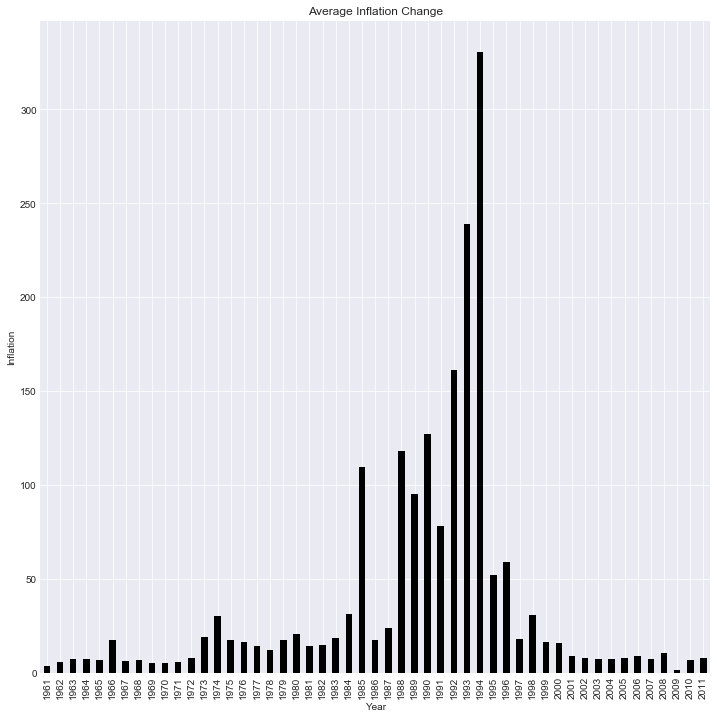

In [5]:
ax = df_inflation.mean().plot(kind='bar', figsize=(12,12), color='black');
ax.set_xlabel('Year')
ax.set_ylabel('Inflation')
ax.set_title('Average Inflation Change');

**Conclusions and Further Analysis**
<br>We see that there is a spike in world inflation between 1985 and 1996. For further analysisI want to dice the data in two ways:
1. Divide the dataset by high and low inflation countries
2. Analyze the spike by dividing the dataset into multiple intervals: 1961-1984, 1985 - 1996, 1997-2011

### Dividing the inflation dataset into two parts - High and Low Inflation Countries ###
Although a simplification, generally inflation above 10 is considered too high. I'll group the countries into two groups: 
1. **Low inflation countries**: Countries with average annual inflation over(or equal to) 10
2. **High inflation countries**: Countries with average annual inflation below 10

I'll then analyze these two datasets separately.

In [6]:
df_inflation_high = df_inflation[df_inflation.mean(axis=1) >= 10]
df_inflation_low = df_inflation[df_inflation.mean(axis=1) < 10]

In [55]:
# checking the amount of data we have in both these datasets
df_inflation_high.shape, df_inflation_low.shape

((82, 51), (90, 51))

We have 82 countries with High Inflation and 90 countries with low Inflation. I'll work first on the high inflation countries and try to get some insights.

#### Plotting Counties with High Annual Inflation (over 10%)####

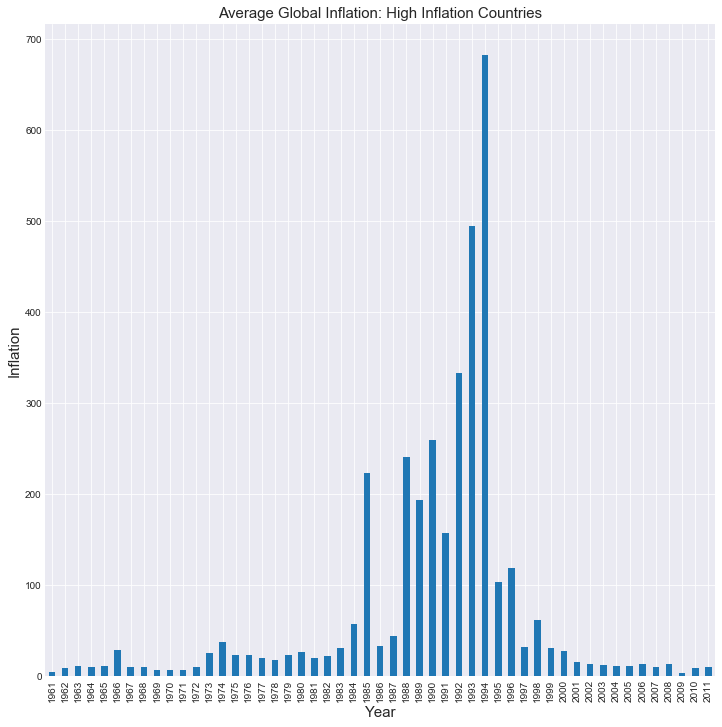

In [54]:
# Plotting inflation rate for high inflation countries
ax = df_inflation_high.mean().plot(kind='bar', figsize=(12,12))
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Inflation', fontsize=15)
ax.set_title('Average Global Inflation: High Inflation Countries', fontsize=15);

**Conclusion**
<br>The chart above shows a sudden spike in the period between 1992 and 1994. I want to analyze if it was caused by some specific countries or was an unusually high inflation common to most countries.

#### High Inflation Countries  - identifying and removing outliers ####

I'll draw a boxplot to see if there are any countries which are causing the spike in the period 1992-1994 in the chart above.

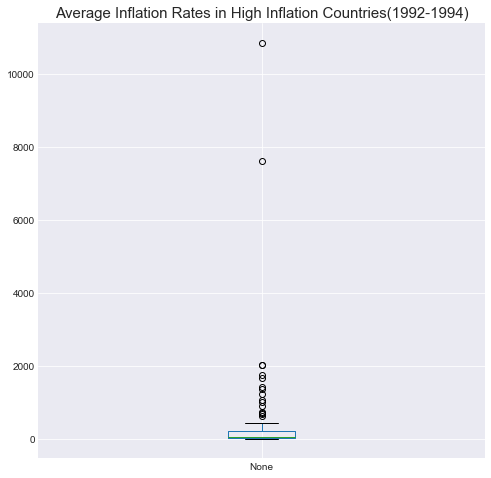

In [56]:
df_inflation_high_1992_1994 = df_inflation_high.loc[:,'1992':'1994'].mean(axis=1)
ax = df_inflation_high_1992_1994.plot(kind='box', figsize=(8,8))
ax.set_title('Average Inflation Rates in High Inflation Countries(1992-1994)', fontsize=15);

**Conclusion**<br>From the box plot above we can see that there are a few outliers that hmake the average inflation between 1992-1994 go really high. We can look into them next.

Below are the top 10 countries which had unusually high average inflation during 1991-1994:

In [65]:
df_inflation_high_1992_1994.sort_values(ascending=False, inplace=True)
df_inflation_high_1992_1994.head(10)

country
Congo, Dem. Rep.    10834.303763
Georgia              7599.360791
Armenia              2022.423526
Ukraine              2016.505335
Brazil               1740.412151
Turkmenistan         1672.451011
Kazakhstan           1420.801609
Belarus              1357.565785
Angola               1210.209434
Azerbaijan           1066.032746
dtype: float64

As we see from the data above, **Congo, Dem. Rep.** and **Georgia** are the two countries that we saw as outliers on the boxplot above. Let's plot the High Inflation dataset again after removing these two countries.

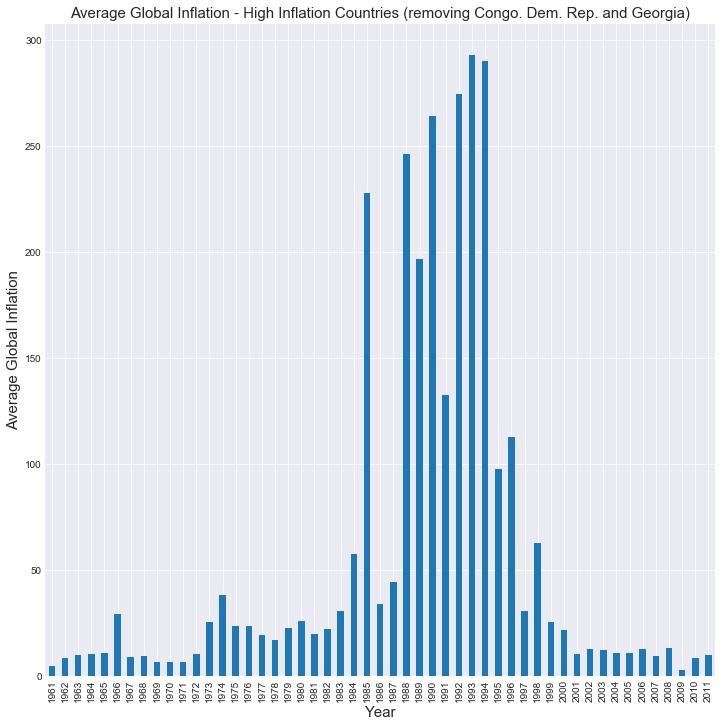

In [68]:
df_inflation_dropped_outliers = df_inflation_high.drop(['Congo, Dem. Rep.', 'Georgia'])
ax = df_inflation_dropped_outliers.mean().plot(kind='bar', figsize=(12,12));
ax.set_ylabel('Average Global Inflation', fontsize=15)
ax.set_xlabel('Year', fontsize=15)
ax.set_title('Average Global Inflation - High Inflation Countries (removing Congo. Dem. Rep. and Georgia)', fontsize=15);

**Conclusion**
<br>As we see from the chart above, after removing the two outliers the mean annual inflation rate has come down considerably. This chart is a better representative of the Mean Global Inflation for the countries with High Inflation. We also see that even after removing our two outliers, the average inflation rate during 1992-1994 remains pretty high. This indicates that there are at least a few other countries which had an unusually high inflation rate during that period. For want of space and time I'll now moe on to the other part of the dataset - Low Inflation Countries.

### Analyzing countries with Low Annual Inflation ###

Now analyzing dataset containing Low Inflation Countries. I'll start by plotting a simple chart and then dive deeper.

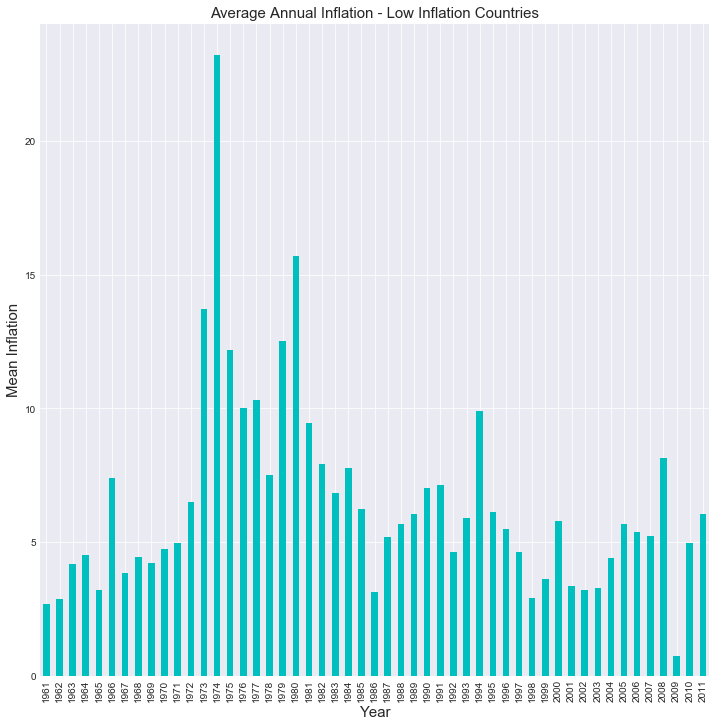

In [70]:
ax = df_inflation_low.mean().plot(kind='bar', figsize=(12,12), color='c')
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Mean Inflation', fontsize=15)
ax.set_title('Average Annual Inflation - Low Inflation Countries', fontsize=15);

#### Conclusion from Low Inflation Dataset ####
We do not see any clear pattern in the data above; there are some local spikes every 8-10 years with some very high inflation period between 1973 and 1980. We also see an unusually low global inflation for 2009.

### Dividing the Inflation dataset by time intervals###
Here I want to dice the data in a different way - dividing the data into three separate datasets with the time periods: 
1. 1961-1984
2. 1985-1994
3. 1995-2011

#### Region 1 - Global Inflation for 1961-1984 ####

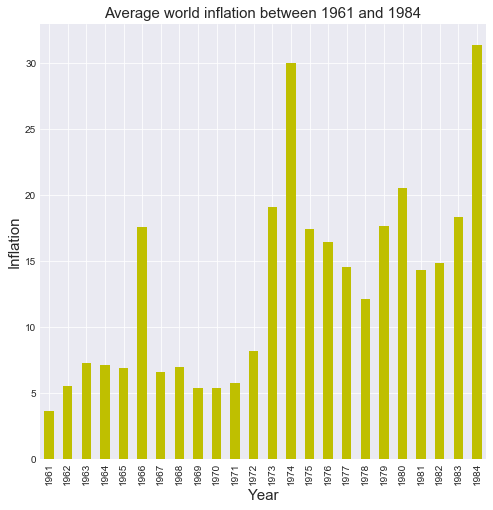

In [71]:
inflation_1961_1984 = df_inflation.loc[:,:'1984'].mean()
ax = inflation_1961_1984.plot(kind='bar', figsize=(8,8), color='y');
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Inflation', fontsize=15)
ax.set_title('Average world inflation between 1961 and 1984', fontsize=15);

**Conclusion (1961-1984)**
<br>The chart above shows that on average global inflation gradually rose between 1961 and 1984, with occassional spikes. The frequency of spikes appears to have inclreased over the years.

#### Region 2 - Global Inflation for 1985-1994 ####

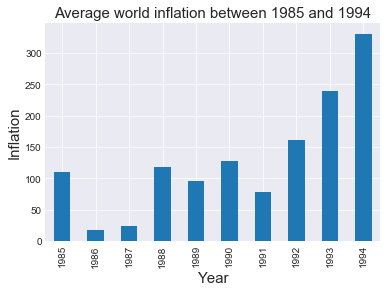

In [72]:
inflation_1985_1994 = df_inflation.loc[:,'1985':'1994'].mean()
ax = inflation_1985_1994.plot(kind='bar');
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Inflation', fontsize=15)
ax.set_title('Average world inflation between 1985 and 1994', fontsize=15);

**Conclusion (1985-1994)**
<br>This is a relatively smaller dataset, and cursory analysis can lead us to conclude that the average global inflation was relatively lower during this time period. However if we see the values on the Y-axis we realize that the inflation during this time period was considerably higher than the previous period. Ony two years of the 10 years plotted here had inflation under 30. In contrast we had only 2 years in the 24 years prior to 1985 where the average global inflation was over 30. So this is a huge difference.

#### Region 3 - Global Inflation for 1995-2011 ####

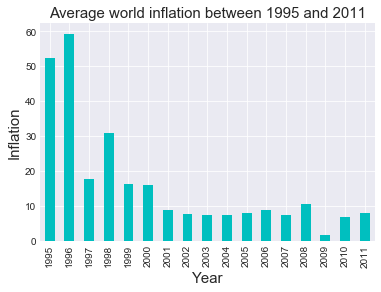

In [73]:
inflation_1995_2011 = df_inflation.loc[:,'1995':].mean()
ax = inflation_1995_2011.plot(kind='bar', color='c');
ax.set_xlabel('Year', fontsize=15)
ax.set_ylabel('Inflation', fontsize=15)
ax.set_title('Average world inflation between 1995 and 2011', fontsize=15);

**Conclusion (1995-2011)**
<br>In this plot we can conclude that the average global inflation has decreased during the plotted period.

## Analyzing the dataset: Life Expectancy at Birth ##

Here I'll try to see what is the general trend for life expectancy at birth with regards to different countries.
1. Is the life expactancy at birth generally increasing or decreasing globally?
2. Which countries have had the lowest/highest life expectancy figures?

In [18]:
df_life.head()

,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,32.47,33.01,33.53,34.07,34.60,35.13,35.66,36.17,36.69,37.20,...,51.0,51.4,51.8,52.0,52.1,52.4,52.8,53.3,53.6,54.0
Albania,63.92,64.84,65.60,66.18,66.59,66.88,67.11,67.32,67.55,67.83,...,75.5,75.7,75.9,76.2,76.4,76.6,76.8,77.0,77.2,77.4
Algeria,48.02,48.55,49.07,49.58,50.09,50.58,51.05,51.49,51.95,52.41,...,73.8,73.9,74.4,74.8,75.0,75.3,75.5,75.7,76.0,76.1
Angola,36.53,37.08,37.63,38.18,38.74,39.28,39.84,40.39,40.95,41.50,...,53.3,53.9,54.5,55.2,55.7,56.2,56.7,57.1,57.6,58.1
Antigua and Barbuda,63.46,63.93,64.38,64.81,65.23,65.63,66.03,66.41,66.81,67.19,...,74.3,74.5,74.6,74.9,74.9,75.3,75.5,75.7,75.8,75.9


#### Checking the general global trend for life expectancy at birth ####

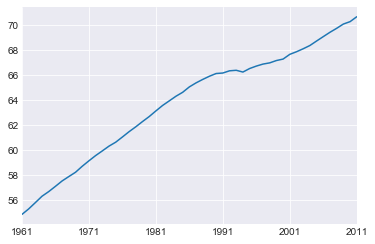

In [19]:
#draw a simple line graph
df_life.mean().plot();

**Conclusion**
<br>This simple line chart indicates that life expectancy has increased globally between 1961 and 2011. We ca now delve deeper into the dataset.

In [20]:
df_life.describe()

,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,...,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,...,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,54.883198,55.320872,55.826337,56.339477,56.709419,57.129128,57.560698,57.911337,58.254942,58.733081,...,67.893430,68.132326,68.392616,68.752151,69.103547,69.451279,69.767558,70.109302,70.300291,70.693663
std,11.794056,11.505843,11.389008,11.379821,11.261003,11.129282,11.012779,10.909436,10.752314,10.539163,...,9.555336,9.555750,9.505384,9.413303,9.256566,9.072392,8.905918,8.699547,9.045927,8.440894
min,29.830000,30.080000,30.400000,30.790000,31.260000,31.800000,32.410000,33.070000,31.630000,34.510000,...,45.100000,44.000000,43.000000,42.500000,43.100000,43.300000,44.500000,45.500000,32.200000,46.700000
25%,45.452500,46.050000,46.927500,47.327500,47.355000,48.115000,48.565000,49.087500,49.427500,49.807500,...,61.300000,61.600000,61.700000,62.100000,62.350000,63.075000,63.125000,63.825000,64.125000,64.000000
50%,55.570000,56.045000,56.510000,56.965000,57.505000,58.100000,58.540000,58.935000,59.385000,59.795000,...,70.550000,70.850000,71.300000,71.700000,71.600000,71.700000,72.150000,72.350000,72.650000,72.450000
75%,65.297500,65.645000,65.797500,66.222500,66.642500,66.950000,67.482500,67.905000,68.260000,68.595000,...,75.175000,75.375000,75.800000,76.200000,76.400000,76.600000,76.825000,77.000000,77.100000,77.125000
max,73.670000,73.820000,73.530000,73.720000,74.000000,74.110000,74.180000,74.120000,74.110000,74.660000,...,81.600000,81.700000,81.900000,82.000000,82.200000,82.400000,82.500000,82.700000,82.800000,82.900000


#### Checking the minumum life expectancy recorded between 1961 and 2011 ####

I below try to plot the minimum life expectancy recorded which shows a sharp dip in the middle.

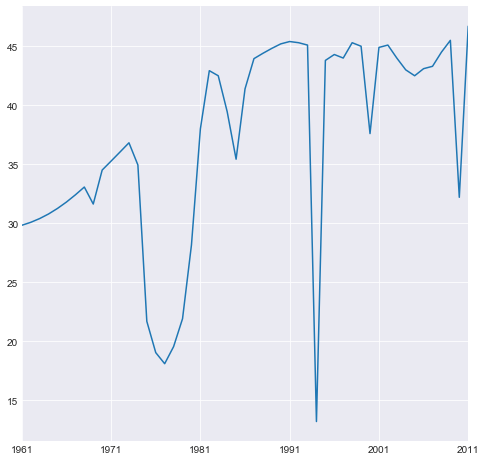

In [21]:
df_life.min().plot(kind='line', figsize=(8,8));

The graph above shows a generally increasing, although a bit irregular, trend. The most marked dip is in the region between 1991 and 2001. Let's analyze what is causing this dip.

In [76]:
# Checking the exact year of the dip
df_life.min().loc['1991':'2001']

1991    45.4
1992    45.3
1993    45.1
1994    13.2
1995    43.8
1996    44.3
1997    44.0
1998    45.3
1999    45.0
2000    37.6
2001    44.9
dtype: float64

In [80]:
# Finding the country that caused the dip
df_life['1994'].sort_values().head()

country
Rwanda     13.2
Burundi    45.0
Malawi     47.4
Zambia     47.7
Uganda     48.5
Name: 1994, dtype: float64

### Analyzing Rwanda - the country that experienced the dip ###

It seems that Rwanda recorded a life expectancy at birth in 1994 as 13.20 years. This is interesting(shocking). ** On researching I discovered that there was a genocide in Rwanda in 1994.**

In [22]:
df_life.loc['Rwanda','1994']

13.199999999999999

** Plotting Rwanda's life expectancy **

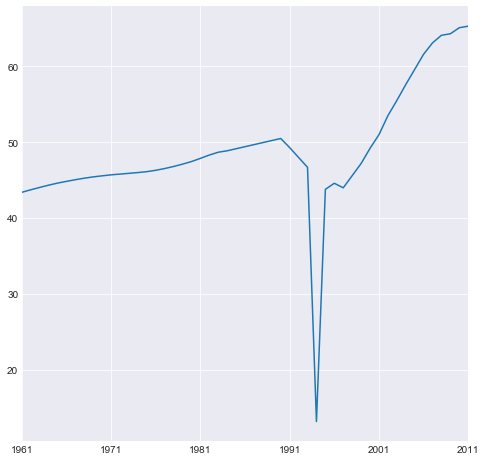

In [23]:
df_life.loc['Rwanda',:].plot(kind='line', figsize=(8,8));

### Analyzing life expectancy figures for bottom 10 countries###
Below I'll try to check the top 10 countries with the best and worst life expectency rates, and see how the rates have changed over time.

In [81]:
life_min = df_life.mean(axis=1).sort_values(ascending=True).head(10)
life_max = df_life.mean(axis=1).sort_values(ascending=False).head(10)

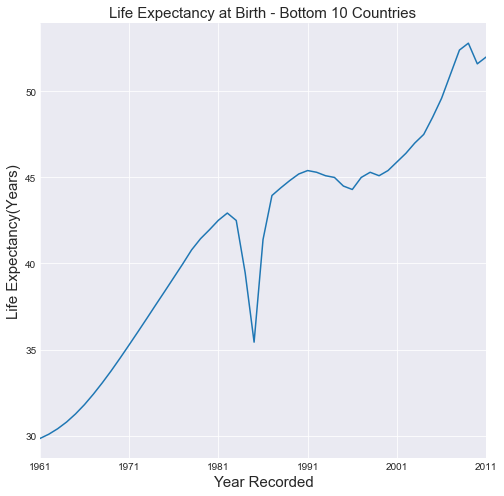

In [83]:
ax = df_life.loc[life_min.index,:].min().plot(kind='line', figsize=(8,8));
ax.set_xlabel('Year Recorded', fontsize=15)
ax.set_ylabel('Life Expectancy(Years)', fontsize=15)
ax.set_title('Life Expectancy at Birth - Bottom 10 Countries', fontsize=15);

Countries in the above chart: Afghanistan, Mali, Malawi, Niger, Ethiopia, Burundi, Guinea, Somalia, Equatorial Guinea, Angola

**Conclusion**
<br>It seems that the life expectancy has been rising gradually for the bottom 10 countries. These countries have show a remarkable growth in life expectancy - an increase of almost 22 years in the period between 1961 and 2011. 

### Analyzing life expectancy figures for top 10 countries ###
I now plot the life expectancy graph for the top 10 countries.

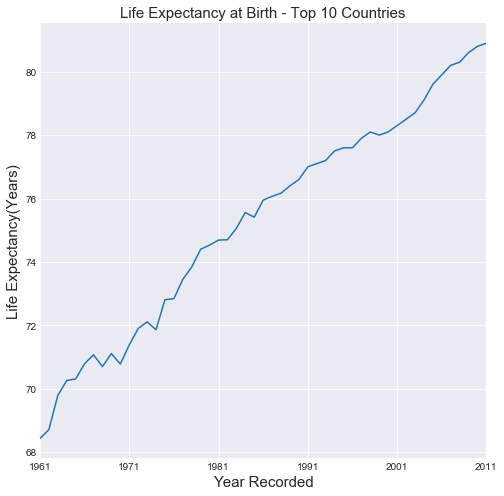

In [86]:
ax = df_life.loc[life_max.index,:].min().plot(kind='line', figsize=(8,8));
ax.set_xlabel('Year Recorded', fontsize=15)
ax.set_ylabel('Life Expectancy(Years)', fontsize=15)
ax.set_title('Life Expectancy at Birth - Top 10 Countries', fontsize=15);

Countries in the chart above: Iceland, Sweden, Japan, Switzerland, Norway, Netherlands, Canada, Spain, Australia, France

**Conclusion**
<br>The life expectancy has been rising at a higher rate for these countries than for the bottom 10. One explanation can be the better medical care available during birth available in these countries. The life expectancy has increased by approximately 12 years for the top 10 countries.

### Analyzing United States ###
Conspicously, United States is absent from the list above. Now trying to plot the life expectancy of United States

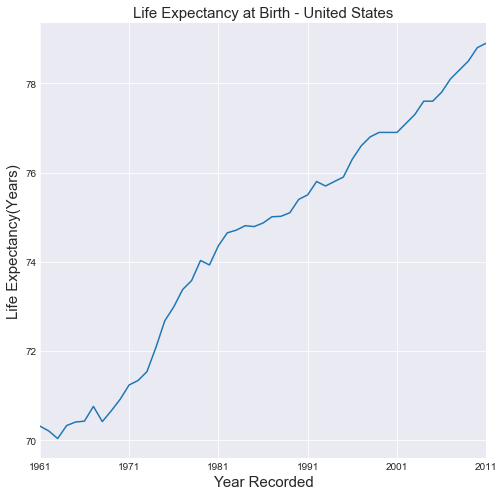

In [87]:
ax = df_life.loc['United States',:].plot(kind='line', figsize=(8,8));
ax.set_xlabel('Year Recorded', fontsize=15)
ax.set_ylabel('Life Expectancy(Years)', fontsize=15)
ax.set_title('Life Expectancy at Birth - United States', fontsize=15);

** Conclusion: United States **
<br>The life expectancy is increasing in the United States, but it is lower than that of the top 10 countries in the world. In 50 years the life expectancy grew from 70 to a little over 78 ~ 8 years

### Analyzing India ###

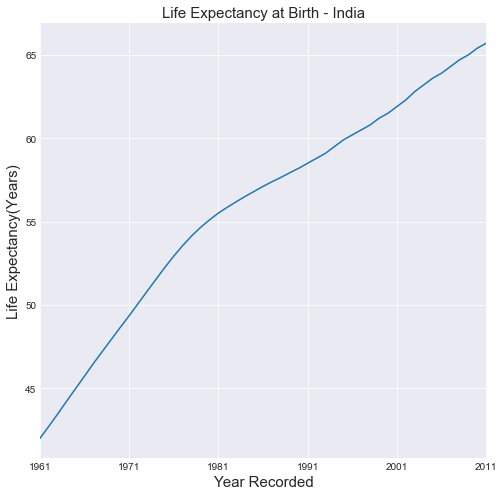

In [88]:
ax = df_life.loc['India',:].plot(kind='line', figsize=(8,8));
ax.set_xlabel('Year Recorded', fontsize=15)
ax.set_ylabel('Life Expectancy(Years)', fontsize=15)
ax.set_title('Life Expectancy at Birth - India', fontsize=15);

** Conclusion: India **
<br>The rate of increase in life expectancy for India has been pretty steep; India increased the average life expectancy by almost 22 years, which is in line with the bottom 10 countries life expectancy chart above.

### Conclusion - Life Expectancy at Birth ###

Globally the life expectancy at birth has consistently risen between 1961 and 2011. There is a lot of difference though between the coutries with the worst and those with the best figures. Rwanda was a country which had a genocide in 1994 and its life expectancy for 1994 dropped to 13.2 years. The remarkable insight is that the countries with relatively bad record in 1961 have improved at a much faster rate than the countries at the top.

## Analyzing the dataset: % Area Covered by Forests ##

Questions I want to answer through the forests dataset:
1. Which countries have the greatest and the least average land % covered by forests? 
2. How is the average global percentage of forest cover been changing?
3. Which are the countries for which the change in forest coverage has been most pronounced?

In [29]:
df_forest.head()

,1990,2000,2005
country,,,
Angola,48.91,47.91,47.41
Botswana,24.21,22.12,21.07
Comoros,6.45,4.30,2.69
Kenya,6.52,6.29,6.19
Lesotho,0.16,0.23,0.26


In [30]:
df_forest.shape

(172, 3)

In [31]:
df_forest.describe()

,1990,2000,2005
count,172.000000,172.000000,172.000000
mean,31.041628,30.153314,29.735698
std,23.801658,22.824414,22.434438
min,0.030000,0.030000,0.030000
25%,10.602500,9.877500,9.952500
50%,28.785000,28.115000,28.425000
75%,47.150000,46.262500,45.417500
max,98.890000,94.720000,94.720000


### Average forest cover distribution (2005) ###

Below I am just trying to find out the frequency distribution of land% coverd by forests. I am plotting the 2005 figures, since I am interested in the latest data that I have available.

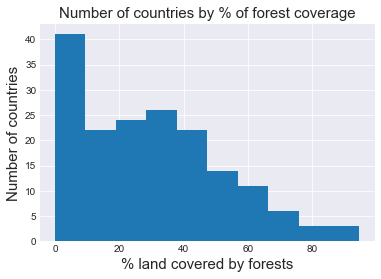

In [89]:
ax = df_forest.loc[:,'2005'].plot(kind='hist')
ax.set_ylabel('Number of countries', fontsize=15)
ax.set_xlabel('% land covered by forests', fontsize=15)
ax.set_title('Number of countries by % of forest coverage', fontsize=15);

**Conclusion**<br>The chart above shows that the a large proportion of countries (over 40%) have less than 10% of their land covered by forests.

### Countries with greatest and least percentage of their land covered by forests ###

We can see from the graph below that only two of the world's developed countries - Finland and Japan - are among the top 10

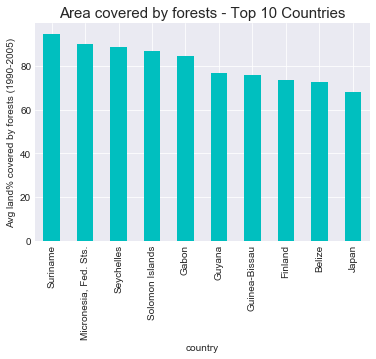

In [93]:
forest_max = df_forest.mean(axis=1).sort_values(ascending=False).head(10)
ax = forest_max.plot(kind='bar', color='c')
ax.set_ylabel('Avg land% covered by forests (1990-2005)')
ax.set_title('Area covered by forests - Top 10 Countries', fontsize=15);

**Conclusion**<br>The top 10 countries have atleast 70% of their land covered by forests. Among them only 2 are developed countries: Finland and Japan.

#### Middle-East and African countries have some of the least land% covered by forests ####
Below I plot the 15 countries with the least area covered by forests

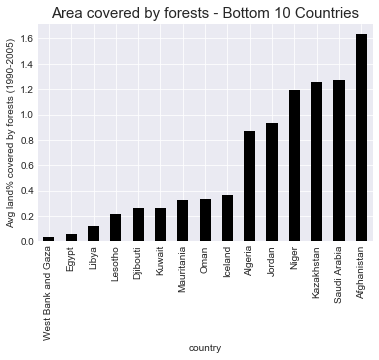

In [96]:
forest_min = df_forest.mean(axis=1).sort_values(ascending=True).head(15)
ax = forest_min.plot(kind='bar', color='black')
ax.set_ylabel('Avg land% covered by forests (1990-2005)')
ax.set_title('Area covered by forests - Bottom 10 Countries', fontsize = 15);

**Conclusion**<br>A lot of countries in the list are in the Middle-East and Africa, where a large part of land is desert region. This might be a factor in the small number of area covered by forests. Similarly, Kazakhstan and Afghanistan, two countries in the chart below that in Asia, are also semi-desert regions. Iceland is mostly rocky plains.

### Analyzing change in forest cover over time ###

I am interested in knowing how has the forest cover distribution changed over time. For this I'll divide the dataset into three groups by forest cover in 2005. After putting these countries into buckets I want to check the average change in forest coverage for each group.
* Low(<20%)
* Medium(20% - 80%)
* High(>80%)
<br>

In [35]:
forest_low = df_forest[df_forest['2005']<10].mean()
forest_med = df_forest[(df_forest['2005'] >= 10) & (df_forest['2005'] <= 80)].mean()
forest_high = df_forest[df_forest['2005']>80].mean()

** Now plotting the change in forest cover percentage, grouped by Low, Medium, or High %Forest coverage area **

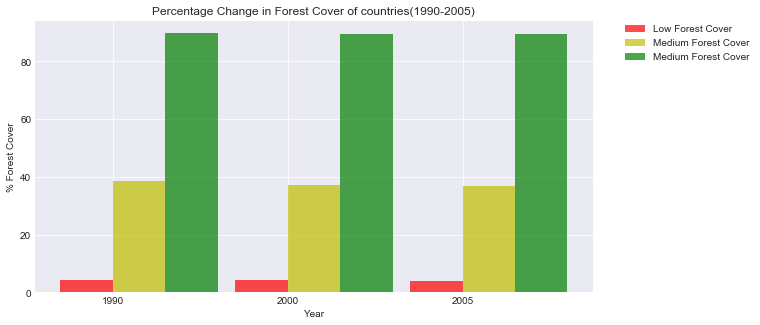

In [36]:
# Set the x coordinate location for each rating group and and width of each bar.
ind = np.arange(len(forest_low))  # the x locations for the groups
width = 0.30       # the width of the bars



# plot bars
plt.figure(figsize=(10,5))
low_bars = plt.bar(ind, forest_low, width, color='r', alpha=.7, label='Low Forest Cover')
med_bars = plt.bar(ind + width, forest_med, width, color='y', alpha=.7, label='Medium Forest Cover')
high_bars = plt.bar(ind + 2*width, forest_high, width, color='g', alpha=.7, label='Medium Forest Cover')

# title and labels
plt.ylabel('% Forest Cover')
plt.xlabel('Year')
plt.title('Percentage Change in Forest Cover of countries(1990-2005)')
locations = ind + width / 2  # xtick locations
labels = ['1990', '2000', '2005']  # xtick labels
plt.xticks(locations, labels)

# legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0);

**Conclusion**<br>The graph does show that there is not a lot of difference between average forest cover percentage over the years, however to see the real differences we'll have to observe these bins individually.

*For the 3 charts below I have clubbed the conclusions at the bottom of the third graph*

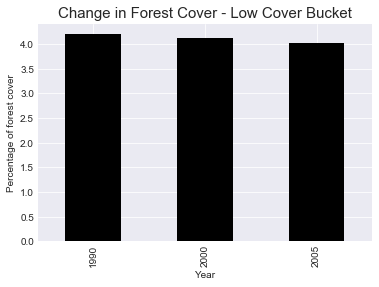

In [100]:
# Change in forest cover: low
ax = forest_low.plot(kind='bar', color='black')
ax.set_xlabel('Year')
ax.set_ylabel('Percentage of forest cover')
ax.set_title('Change in Forest Cover - Low Cover Bucket', fontsize=15);

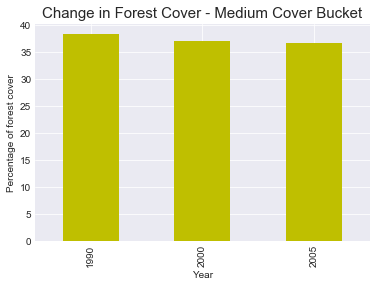

In [101]:
# Change in forest cover: med
ax = forest_med.plot(kind='bar', color='y')
ax.set_xlabel('Year')
ax.set_ylabel('Percentage of forest cover')
ax.set_title('Change in Forest Cover - Medium Cover Bucket', fontsize=15);

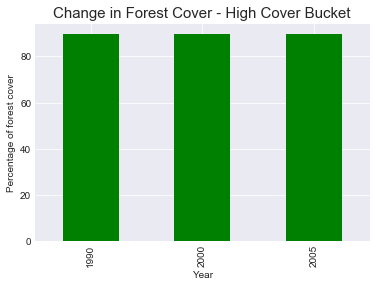

In [102]:
# Change in forest cover: med
ax = forest_high.plot(kind='bar', color='g')
ax.set_xlabel('Year')
ax.set_ylabel('Percentage of forest cover')
ax.set_title('Change in Forest Cover - High Cover Bucket', fontsize=15);

** Conclusion - Change in forest cover **
<br>The 3 charts above depict that there has been a slight decrease in forest cover percentage globally. The decline appears much more acute if we use a line graph instead of a bar.

### Countries with a sharp change in forest cover over time ###

I am trying to analyze which countries that have had a sharp increase or reduction in their forest cover percentage. We have a large datase of 172 countries, so for visualization purposes I'll focus on countries with the greatest change in in land area covered by forests.

** *It is to be noted that the time period in the dataset is not equally spaced.* ** We have a 10-year(1990-2000) and a 5-year(2000-2005) time period. For the 10-year period I analyze countries with over 5% change, and for the 5-year period I analyze countries with over 2% change. I ahve presented the conclusion for the 2 graphs below, at the bottom.

In [40]:
# Getting the change in forest cover between 1990 and 2000, and between 2000 and 2005
forest_change_1990to2000 = df_forest.loc[:,'2000'] - df_forest.loc[:,'1990']
forest_change_2000to2005 = df_forest.loc[:,'2005'] - df_forest.loc[:,'2000']

In [41]:
forest_change_1990to2000_over5 = forest_change_1990to2000[np.logical_or(forest_change_1990to2000 > 5, forest_change_1990to2000 < -5)]
forest_change_2000to2005_over2 = forest_change_2000to2005[np.logical_or(forest_change_2000to2005 > 2, forest_change_2000to2005 < -2)]

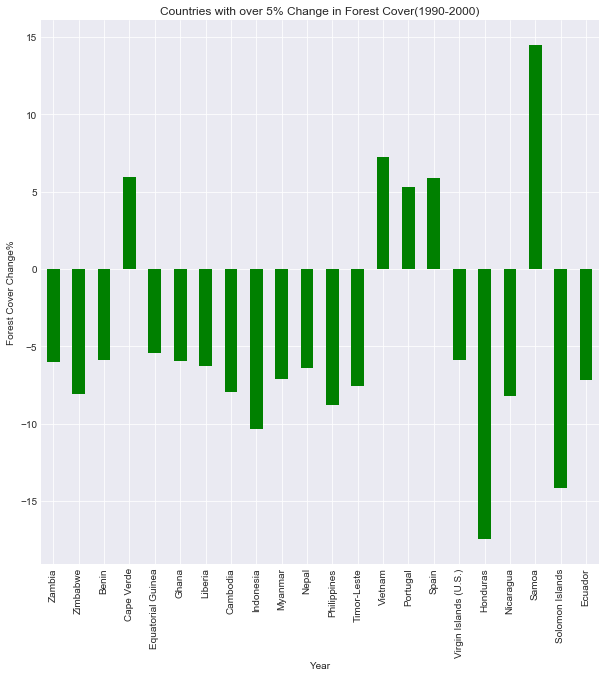

In [42]:
ax = forest_change_1990to2000_over5.plot(kind='bar', figsize=(10,10), color='g');
ax.set_xlabel('Year')
ax.set_ylabel('Forest Cover Change%')
ax.set_title('Countries with over 5% Change in Forest Cover(1990-2000)');

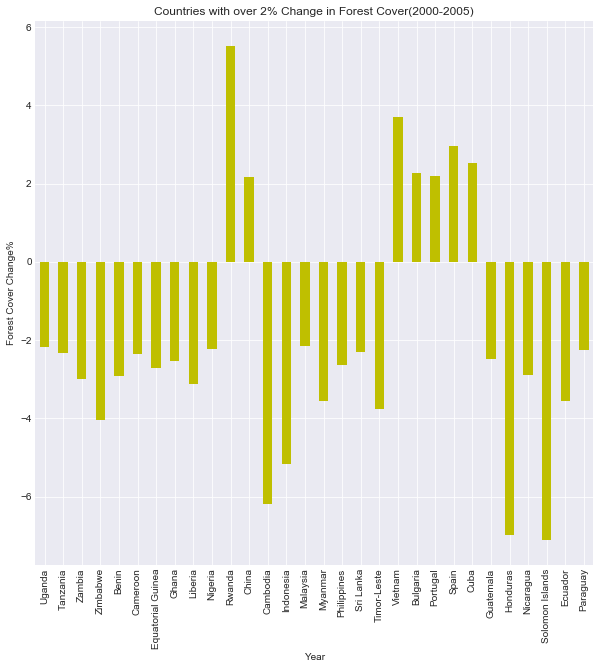

In [43]:
ax = forest_change_2000to2005_over2.plot(kind='bar', figsize=(10,10), color='y');
ax.set_xlabel('Year')
ax.set_ylabel('Forest Cover Change%')
ax.set_title('Countries with over 2% Change in Forest Cover(2000-2005)');

In [44]:
forest_change_1990to2000_over5.sort_values(ascending=False).head(10)

country
Samoa                    14.48
Vietnam                   7.25
Cape Verde                5.96
Spain                     5.92
Portugal                  5.29
Equatorial Guinea        -5.42
Benin                    -5.85
Virgin Islands (U.S.)    -5.88
Ghana                    -5.95
Zambia                   -5.98
dtype: float64

In [45]:
forest_change_2000to2005_over2.sort_values(ascending=False).head(10)

country
Rwanda      5.52
Vietnam     3.71
Spain       2.96
Cuba        2.53
Bulgaria    2.26
Portugal    2.18
China       2.17
Malaysia   -2.14
Uganda     -2.19
Nigeria    -2.24
dtype: float64

#### Conclusions - Sharpest % Change in Forest Cover ####
As we can see in both these figures, the number of countries with decreasing forest cover is definitely larger than the countries with increasing forest cover.

### Conclusions - % Area Covered by Forests ###

1. Forest cover has decreasing globally between 1990 and 2005; the decrease is more pronounced for countries with less than 20% of land area covered by forests
2. Only two of the developed countries(Japan, Finland) have a high percentage of land(over 80%) covered by forests.
3. All of the top 15 countries with the smallest percentage of land covered by forests are in the desert and semi-desert regions. Most of them are in the Middle-East and Africa.
4. Since 1995, many more countries have seen a decline in their forest cover, than an increase. Sharpest declines have been seen for Cambodia, Indonesia, Honduras, Nicaragua. Greatest increase in forest cover has been seen in Rwanda, Samoa, Bulgaria, and Portugal.
5. Vietnam, Spain and Portugal have had consistent increase in forest cover dugin the period 1990-2005. China, Bulgaria and Rwanda have started increasing their forest cover since 2000.

### Future Work and Potential Areas to Explore ###
I have analyzed three seemingly unrelated datasets. We can extend the conclusions above by analyzing more data related to these data. For example, Inflation dataset can be studied along with a dataset having global average GDP; this would give us a better idea of the economic trends over the past 50 years.

Similarly, for the forest cover dataset we can probably look at the population growth of a particular country and see if there is a correlation between population growth and decrease in forest cover. This can also show us if there are any countries which have been successful in keeping a sizeable forest cover while also increasing its population.

### Limitations of Analysis###
I am not using any inferential statistics or machine learning for analysis. The analysis presented in this project is based on past trends and is not indicative of future trends.